In [1]:
import pandas as pd 
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
num_samples=100

In [6]:
data = {
    'start_latitude': np.random.uniform(40.0, 41.0, num_samples),
    'start_longitude': np.random.uniform(-71.0, -72.0, num_samples),
    'end_latitude': np.random.uniform(40.0, 41.0, num_samples),
    'end_longitude': np.random.uniform(-71.0, -72.0, num_samples),
    'distance_km': np.random.uniform(1.0, 20.0, num_samples),
    'num_turns': np.random.randint(0, 10, num_samples),
    'num_traffic_lights': np.random.randint(0, 10, num_samples),
    'time_of_day': np.random.choice(['morning', 'afternoon', 'evening', 'night'], num_samples),
    'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], num_samples),
    'historical_avg_speed_kmh': np.random.uniform(40.0, 80.0, num_samples),
    'current_traffic_conditions': np.random.choice(['light', 'moderate', 'heavy'], num_samples),
    'eta_minutes': np.random.uniform(5, 120, num_samples)  
}


In [7]:
df=pd.DataFrame(data)

In [8]:
df.shape

(100, 12)

In [9]:
df.describe()

,start_latitude,start_longitude,end_latitude,end_longitude,distance_km,num_turns,num_traffic_lights,historical_avg_speed_kmh,eta_minutes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,40.470181,-71.497832,40.517601,-71.491149,10.804871,3.750000,4.760000,59.022098,64.718667
std,0.297489,0.293111,0.293426,0.293452,6.053417,2.900279,3.038873,10.696829,33.404894
min,40.005522,-71.985650,40.005062,-71.990505,1.205915,0.000000,0.000000,40.488123,5.269030
25%,40.193201,-71.766184,40.276880,-71.735778,6.014762,1.000000,2.000000,49.805854,35.941672
50%,40.464142,-71.505625,40.562555,-71.509718,10.982590,4.000000,5.000000,58.981376,66.496506
75%,40.730203,-71.242005,40.752367,-71.249615,16.140799,6.000000,7.250000,68.562417,91.065599
max,40.986887,-71.006952,40.990054,-71.014393,19.866331,9.000000,9.000000,79.021653,119.925652


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   start_latitude              100 non-null    float64
 1   start_longitude             100 non-null    float64
 2   end_latitude                100 non-null    float64
 3   end_longitude               100 non-null    float64
 4   distance_km                 100 non-null    float64
 5   num_turns                   100 non-null    int32  
 6   num_traffic_lights          100 non-null    int32  
 7   time_of_day                 100 non-null    object 
 8   day_of_week                 100 non-null    object 
 9   historical_avg_speed_kmh    100 non-null    float64
 10  current_traffic_conditions  100 non-null    object 
 11  eta_minutes                 100 non-null    float64
dtypes: float64(7), int32(2), object(3)
memory usage: 8.7+ KB


In [11]:
def separate_data(df):
    categorical=df.select_dtypes(include=['object'])
    numerical=df.select_dtypes(include=['int','float'])
    return categorical,numerical

In [12]:
categorical,numerical=separate_data(df)

In [14]:
numerical

,start_latitude,start_longitude,end_latitude,end_longitude,distance_km,num_turns,num_traffic_lights,historical_avg_speed_kmh,eta_minutes
0,40.374540,-71.031429,40.642032,-71.051682,2.959354,5,7,45.725119,79.181229
1,40.950714,-71.636410,40.084140,-71.531355,18.148505,0,0,48.181784,53.495952
2,40.731994,-71.314356,40.161629,-71.540635,10.599795,8,9,68.562563,20.211764
3,40.598658,-71.508571,40.898554,-71.637430,16.702692,0,0,59.759259,108.565815
4,40.156019,-71.907566,40.606429,-71.726091,7.080942,4,3,70.185412,84.490514
...,...,...,...,...,...,...,...,...,...
95,40.493796,-71.349210,40.522243,-71.930757,7.713692,2,7,63.498144,90.682423
96,40.522733,-71.725956,40.769994,-71.858413,12.089466,0,7,51.761787,11.311501
97,40.427541,-71.897110,40.215821,-71.428994,2.476958,4,0,68.562368,57.341524
98,40.025419,-71.887086,40.622890,-71.750871,19.513501,3,2,61.105909,65.079976


In [13]:
categorical

,time_of_day,day_of_week,current_traffic_conditions
0,morning,Friday,light
1,morning,Tuesday,moderate
2,afternoon,Thursday,moderate
3,night,Monday,moderate
4,afternoon,Sunday,heavy
...,...,...,...
95,morning,Monday,light
96,evening,Friday,light
97,afternoon,Friday,heavy
98,night,Wednesday,light


In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
LE=LabelEncoder()

In [22]:
for col in categorical:
    df[col] = LE.fit_transform(df[col])

In [118]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [23]:
df.head()

,start_latitude,start_longitude,end_latitude,end_longitude,distance_km,num_turns,num_traffic_lights,time_of_day,day_of_week,historical_avg_speed_kmh,current_traffic_conditions,eta_minutes
0,40.374540,-71.031429,40.642032,-71.051682,2.959354,5,7,2,0,45.725119,1,79.181229
1,40.950714,-71.636410,40.084140,-71.531355,18.148505,0,0,2,5,48.181784,2,53.495952
2,40.731994,-71.314356,40.161629,-71.540635,10.599795,8,9,0,4,68.562563,2,20.211764
3,40.598658,-71.508571,40.898554,-71.637430,16.702692,0,0,3,1,59.759259,2,108.565815
4,40.156019,-71.907566,40.606429,-71.726091,7.080942,4,3,0,3,70.185412,0,84.490514


In [24]:
import matplotlib.pyplot as plt

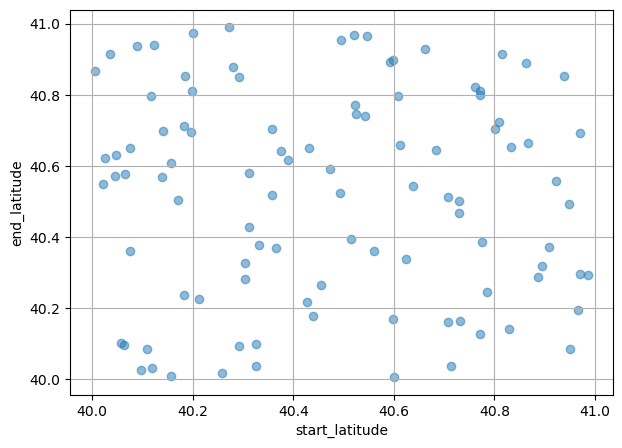

In [37]:
plt.figure(figsize=(7,5))
plt.scatter(df['start_latitude'],df['end_latitude'],alpha=0.5)
plt.xlabel('start_latitude')
plt.ylabel('end_latitude')
plt.grid(True)
plt.show()

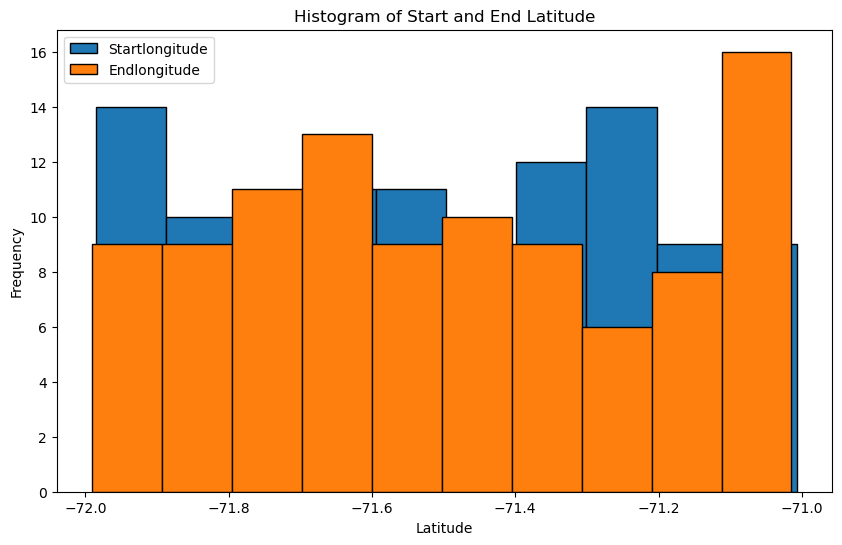

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['start_longitude'], bins=10, label='Startlongitude', edgecolor='black')
plt.hist(df['end_longitude'], bins=10, label='Endlongitude', edgecolor='black')
plt.xlabel('longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Start and End Latitude')
plt.legend()
plt.show()

In [54]:
x=df.[ :-1]

SyntaxError: invalid syntax (1483951796.py, line 1)

In [52]:
x

,start_latitude,start_longitude,end_latitude,end_longitude,distance_km,num_turns,num_traffic_lights,time_of_day,day_of_week,historical_avg_speed_kmh,current_traffic_conditions,eta_minutes
0,40.37454,-71.031429,40.642032,-71.051682,2.959354,5,7,2,0,45.725119,1,79.181229


In [55]:
import seaborn as sns

<Axes: >

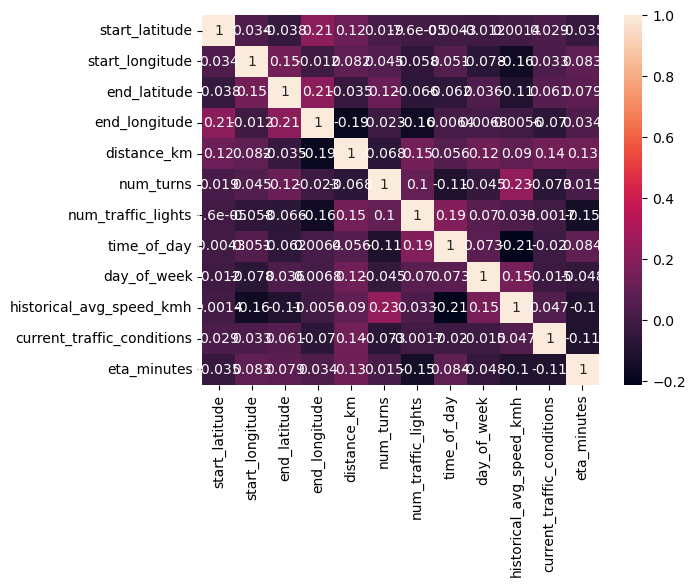

In [57]:
sns.heatmap(df.corr(),annot=True)

In [62]:
correlations=df.corr()['eta_minutes'].abs()
high_correlation=correlations[correlations>0.1].index

In [63]:
high_correlation

Index(['distance_km', 'num_traffic_lights', 'historical_avg_speed_kmh',
       'current_traffic_conditions', 'eta_minutes'],
      dtype='object')

In [79]:
from sklearn.feature_selection import SelectKBest,f_regression

In [65]:
x=df.drop(['eta_minutes'],axis=1)

In [66]:
y=df['eta_minutes']

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=40)

In [73]:
x_train.head()

,start_latitude,start_longitude,end_latitude,end_longitude,distance_km,num_turns,num_traffic_lights,time_of_day,day_of_week,historical_avg_speed_kmh,current_traffic_conditions
71,40.198716,-71.016588,40.810113,-71.018222,19.427698,4,2,3,2,46.620533,0
15,40.183405,-71.871461,40.237249,-71.695974,9.520465,1,5,2,3,40.488123,2
18,40.431945,-71.892559,40.649633,-71.156437,13.777851,7,7,0,2,68.647163,0
23,40.366362,-71.110052,40.367716,-71.279934,10.393986,0,2,0,0,49.094039,1
5,40.155995,-71.249292,40.009197,-71.975852,18.014941,3,7,3,0,44.116641,0


In [74]:
x_test.head()

,start_latitude,start_longitude,end_latitude,end_longitude,distance_km,num_turns,num_traffic_lights,time_of_day,day_of_week,historical_avg_speed_kmh,current_traffic_conditions
46,40.311711,-71.609564,40.428184,-71.635094,19.734020,4,5,3,2,49.436241,2
52,40.939499,-71.144895,40.851137,-71.658694,9.060218,8,7,3,5,49.095825,0
54,40.597900,-71.985650,40.169493,-71.070569,3.112752,2,2,1,5,55.172228,0
38,40.684233,-71.363630,40.645472,-71.474174,14.418602,4,9,3,4,70.849867,2
19,40.291229,-71.539342,40.849223,-71.250243,15.295116,0,3,0,4,63.961175,2


In [75]:
x_train.shape

(60, 11)

In [76]:
x_test.shape

(40, 11)

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rfr=RandomForestRegressor(n_estimators=50)

In [84]:
rfr.fit(x,y)

RandomForestRegressor(n_estimators=50)

In [85]:
y_pred=rfr.predict(x_test)

In [86]:
y_pred

array([89.57842238, 54.25999909, 54.91493568, 88.48512566, 43.35449738,
       94.47223719, 64.02141832, 61.18197605, 45.86385931, 62.91894626,
       78.94395754, 54.04442089, 91.88436534, 60.83305706, 61.49485762,
       83.1762004 , 37.97673107, 58.57083365, 56.46536161, 93.64138146,
       57.68786848, 59.08327118, 70.29614847, 68.81359235, 41.22955142,
       60.86187956, 72.78108179, 61.0813952 , 77.45053148, 82.01901238,
       32.86304229, 45.69892126, 81.60960592, 79.90424781, 94.27592748,
       95.32187347, 87.66914421, 54.99153073, 53.35020376, 22.11784917])

In [89]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [90]:
mse = mean_squared_error(y_test, y_pred)

In [91]:
mse 

221.20690455501122

In [93]:
r2 = r2_score(y_test, y_pred)

In [113]:
r2

0.7836399596086662

In [96]:
rmse = np.sqrt(mse)

In [97]:
rmse 

14.873026072558712

In [98]:
mae = np.mean(np.abs(y_test - y_pred))

In [99]:
mae

12.264367615752569

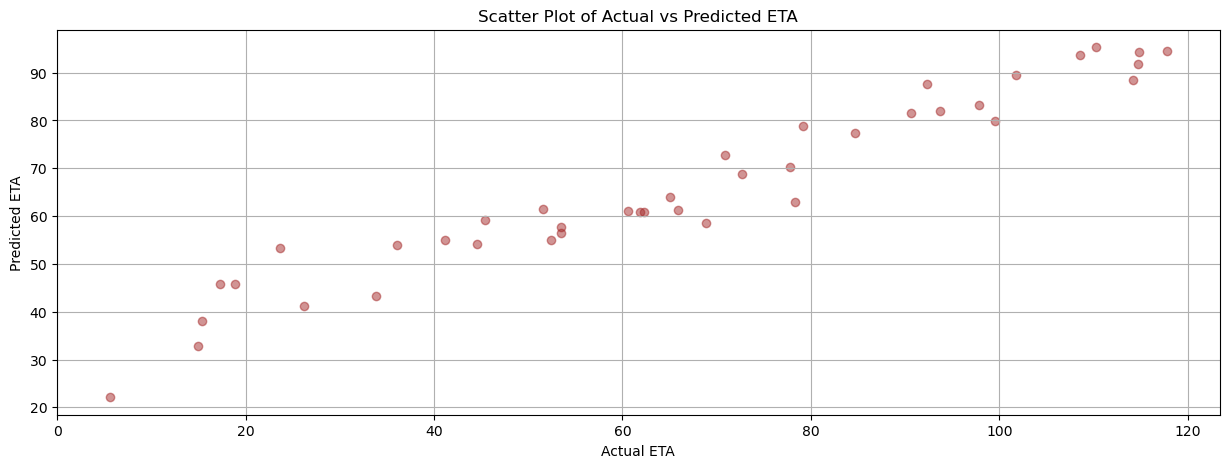

In [110]:
plt.figure(figsize=(15, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='brown')
plt.xlabel('Actual ETA')
plt.ylabel('Predicted ETA')
plt.title('Scatter Plot of Actual vs Predicted ETA')
plt.grid(True)
plt.show()

In [104]:
residuals = y_test - y_pred

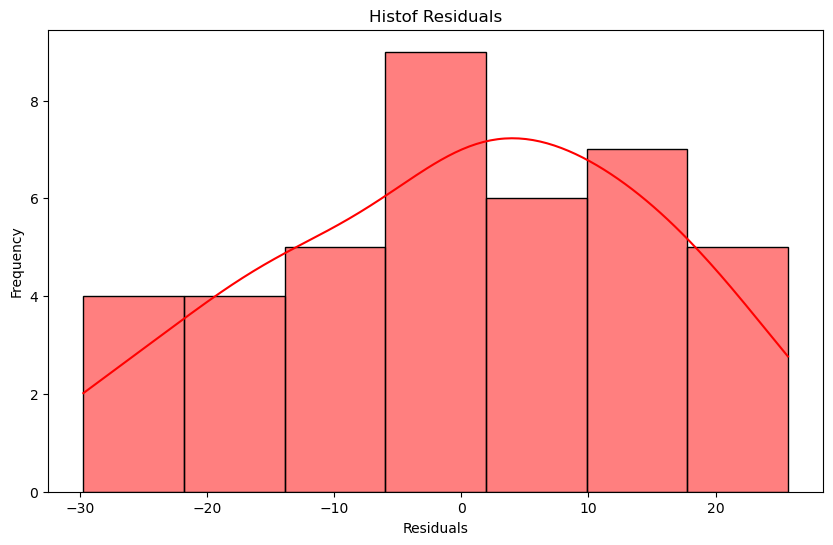

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals,kde=True, color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histof Residuals')
plt.show()
